In [56]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [57]:
data = pd.read_csv("data/top50.csv", encoding="latin1")

In [58]:
data.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


10.5
0.25
0.5


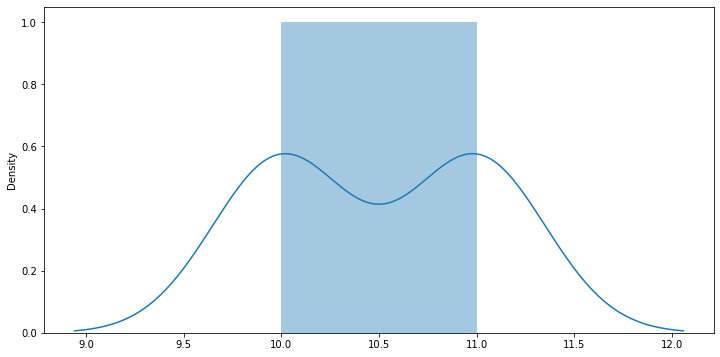

In [60]:

import seaborn as sns
%matplotlib inline


l = [10, 11, 10, 11, 10, 11, 10, 11]
import math
media = 0
for i in l:
    media+=i
media = media/len(l)

r = 0
for i in l:
    r+= (i - media)**2
variancia = r/len(l)
std = math.sqrt(variancia)

print(media)
print(variancia)
print(std)


ax = sns.distplot(l)
ax.figure.set_size_inches(12,6)
ax=ax

In [61]:
data.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


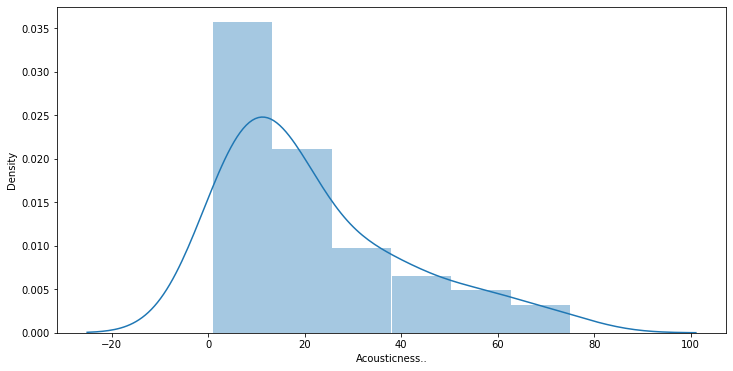

In [72]:
ax = sns.distplot(data["Acousticness.."])
ax.figure.set_size_inches(12,6)
ax=ax

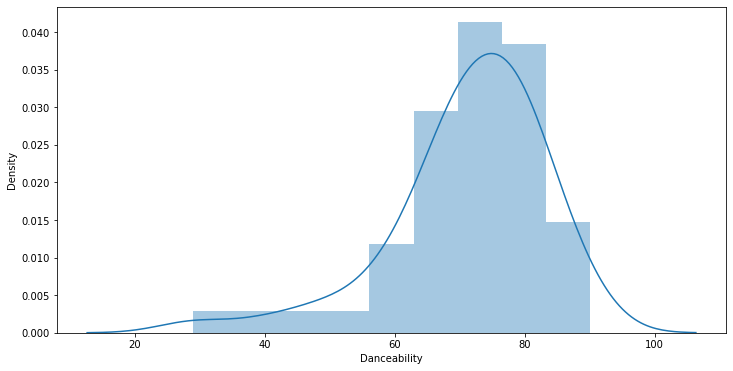

In [66]:
ax = sns.distplot(data["Danceability"])
ax.figure.set_size_inches(12,6)
ax=ax

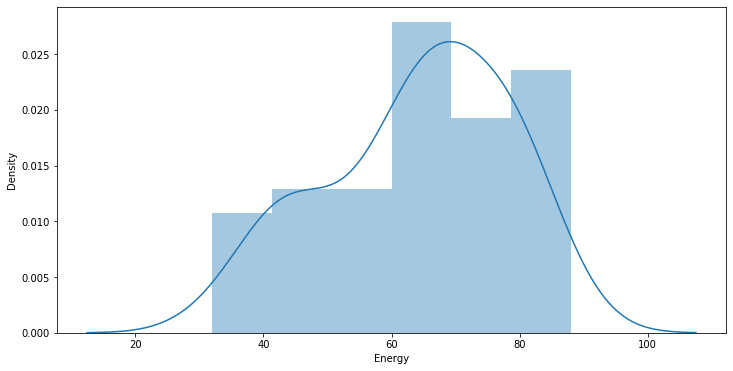

In [67]:
ax = sns.distplot(data["Energy"])
ax.figure.set_size_inches(12,6)
ax=ax

Text(0.5, 0, 'Medida')

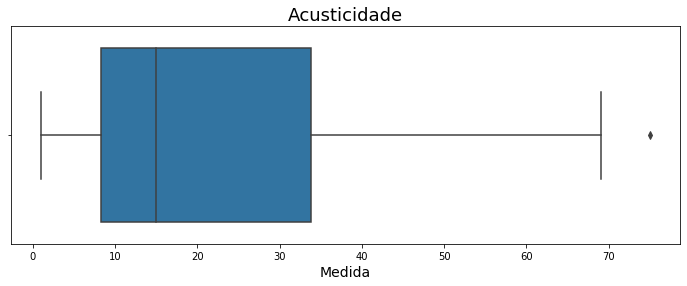

In [73]:
ax = sns.boxplot(x="Acousticness..", data=data, orient="H")
ax.figure.set_size_inches(12,4)
ax.set_title("Acusticidade", fontsize=18)
ax.set_xlabel("Medida", fontsize=14)

In [76]:
data_2 = pd.read_csv("data/obs.csv", encoding="latin1")

In [80]:
data_2.head()

,obs
0,Vendedora Amanda solicitou o cancelamento para...
1,CLIENTE IRA REALIZAR ALTERAÇÃO DE PLANO.
2,Ativar no dia 05/02/20
3,"Estamos realizando o procedimentos, para cabea..."
4,"Estamos realizando o procedimentos, para cabea..."


In [82]:
import pandas as pd
import re
import unidecode
import demoji
import nltk
from nltk.corpus import stopwords
from spacy.lang.pt.stop_words import STOP_WORDS
import spacy
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import tokenize
import nltk

%matplotlib inline

nlp = spacy.load("pt")
nlp.Defaults.stop_words |= {"gt", "&gt", "to","uol","mi","budddhetg","the", "ne", "vou", "ta", "via","ex", "pq", "vc","aa","pra","to", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"}

In [83]:
palavras_irrelevantes = set(stopwords.words('portuguese') + list(punctuation))

In [84]:
def cleanText(tweet):
    if "|" in tweet:
        tweet = tweet.split("|")[1]
    
    tweet = ' '.join(re.sub(r"http\S+", "", tweet).split())
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([0-9])", " ", tweet).split())
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
    tweet = ' '.join(re.sub("[\_\|\.\,\"\'\!\?\:\;\$\-\(\)\=]", " ", tweet).split())
    tweet = tweet.lower()
    
    le = list(demoji.findall(tweet))
    for i in le:
        tweet = tweet.replace(i, "")
    
    if tweet.startswith('rt '):
        tweet = tweet.replace("rt ", "")
    
    lNewTweet = []
    for i in tweet.split(" "):
        if i not in palavras_irrelevantes and i not in STOP_WORDS:
            lNewTweet.append(i)
    
    newTweet = " ".join(lNewTweet)
        
    return unidecode.unidecode(newTweet.replace(" rt ", ""))

In [85]:
data_2["clean_text"] = data_2.obs.apply(cleanText)

In [1]:
data_2.head()

NameError: name 'data_2' is not defined

In [1]:
# for i in data_2['clean_text']:
#     print(i)

In [2]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.7105263157894737

In [8]:
a = classification_report(y_test, y_pred)

In [9]:
confusion_matrix(y_test, y_pred)

In [16]:
print(a)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.56      0.77      0.65        13
           2       0.67      0.46      0.55        13

    accuracy                           0.71        38
   macro avg       0.74      0.72      0.72        38
weighted avg       0.73      0.71      0.71        38



## Genetic Algorithm from Scratch

In [21]:
from numpy.random import randint
from numpy.random import rand
import sys
 
# objective function
def onemax(x):
	return -sum(x)
 
# tournament selection
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]
 
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]
 
# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]
 
# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]

    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval]
 
# define the total iterations
n_iter = 100
# bits
n_bits = 20
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)
# perform the genetic algorithm search
best, score = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
print('f(%s) = %f' % (best, score))

>0, new best f([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]) = -15.000
>1, new best f([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -16.000
>1, new best f([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -17.000
>3, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -20.000
Done!
f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -20.000000


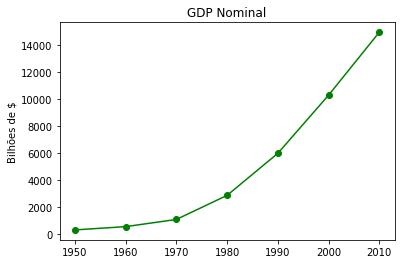

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# cria um gráfico de linha, anos no eixo x, gdp no eixo y
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# adiciona um título
plt.title("GDP Nominal")
# adiciona um selo no eixo y
plt.ylabel("Bilhões de $")
plt.show()